## Zadanie zostało wykonane na wariancie 2, ponieważ nie ma 13'ego pliku, a wariant 1 wygląda na uszkodzony? (cała kolumna y ma wartości=0)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
df = pd.read_csv('war2.csv', sep=';', decimal=',')
print("Pierwsze wiersze danych:")
print(df.head())
print(f"\nWymiary danych: {df.shape}")

# Przygotowanie macierzy A i wektora b
A = df[['x1', 'x2']].values  # macierz cech (x1, x2)
b = df['y'].values           # wektor wyników y

print(f"\nMacierz A: {A.shape}")
print(f"Wektor b: {b.shape}")

Pierwsze wiersze danych:
   x1  x2          y
0   1   2  12.143339
1   3   6  32.408283
2   5  10  72.326867
3   7  14  67.885896
4   9  18  48.631112

Wymiary danych: (110, 3)

Macierz A: (110, 2)
Wektor b: (110,)


In [15]:
# SVD macierzy A
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Macierz pseudoodwrotna A+ = V * Σ^(-1) * U^T
Sigma_inv = np.diag(1.0 / S)
A_plus = VT.T @ Sigma_inv @ U.T

# Wektor współczynników: x = A+ * b
x = A_plus @ b
a, b_coef = x[0], x[1]

print(f"\n--- Wynik regresji SVD ---")
print(f"a (współczynnik przy x1) = {a:.6f}")
print(f"b (współczynnik przy x2) = {b_coef:.6f}")
print(f"Równanie: y = {a:.6f} * x1 + {b_coef:.6f} * x2")


--- Wynik regresji SVD ---
a (współczynnik przy x1) = 445258921013867.500000
b (współczynnik przy x2) = -222629460506929.093750
Równanie: y = 445258921013867.500000 * x1 + -222629460506929.093750 * x2


In [16]:
# Pseudoodwrotna wbudowana
A_plus_np = np.linalg.pinv(A)
x_np = A_plus_np @ b
a_np, b_np = x_np[0], x_np[1]

print(f"\n--- Wynik regresji (np.linalg.pinv) ---")
print(f"a = {a_np:.6f}")
print(f"b = {b_np:.6f}")

# Sprawdzenie różnicy
diff = np.abs(x - x_np).max()
print(f"Maksymalna różnica między metodami: {diff:.2e}")


--- Wynik regresji (np.linalg.pinv) ---
a = 1.811775
b = 3.623550
Maksymalna różnica między metodami: 4.45e+14


In [17]:
# Predykcje
y_pred = A @ x

# Błąd średniokwadratowy (MSE)
mse = np.mean((b - y_pred) ** 2)
# R^2 (współczynnik determinacji)
ss_res = np.sum((b - y_pred) ** 2)
ss_tot = np.sum((b - np.mean(b)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"\n--- Metryki jakości ---")
print(f"MSE: {mse:.6f}")
print(f"R^2: {r2:.6f}")


--- Metryki jakości ---
MSE: 226845.212037
R^2: 0.588115


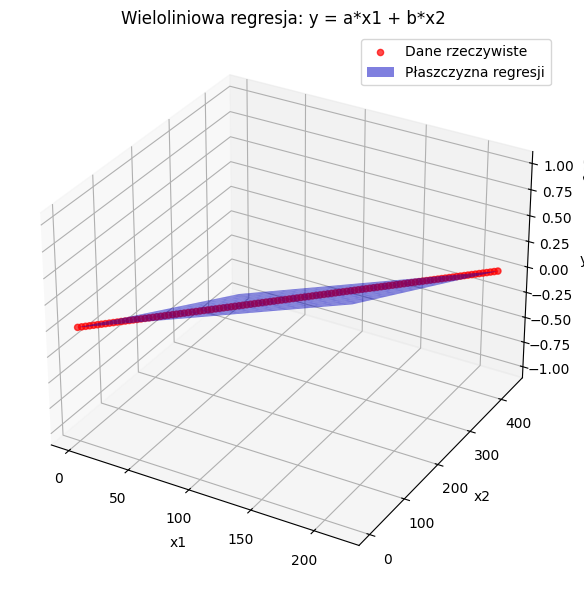

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Dane rzeczywiste
ax.scatter(df['x1'], df['x2'], df['y'], c='r', marker='o', label='Dane rzeczywiste', alpha=0.7)

# Płaszczyzna regresji
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 20)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 20)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = a * X1 + b_coef * X2
ax.plot_surface(X1, X2, Y, alpha=0.5, color='blue', label='Płaszczyzna regresji')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Wieloliniowa regresja: y = a*x1 + b*x2')
ax.legend()
plt.tight_layout()
plt.show()